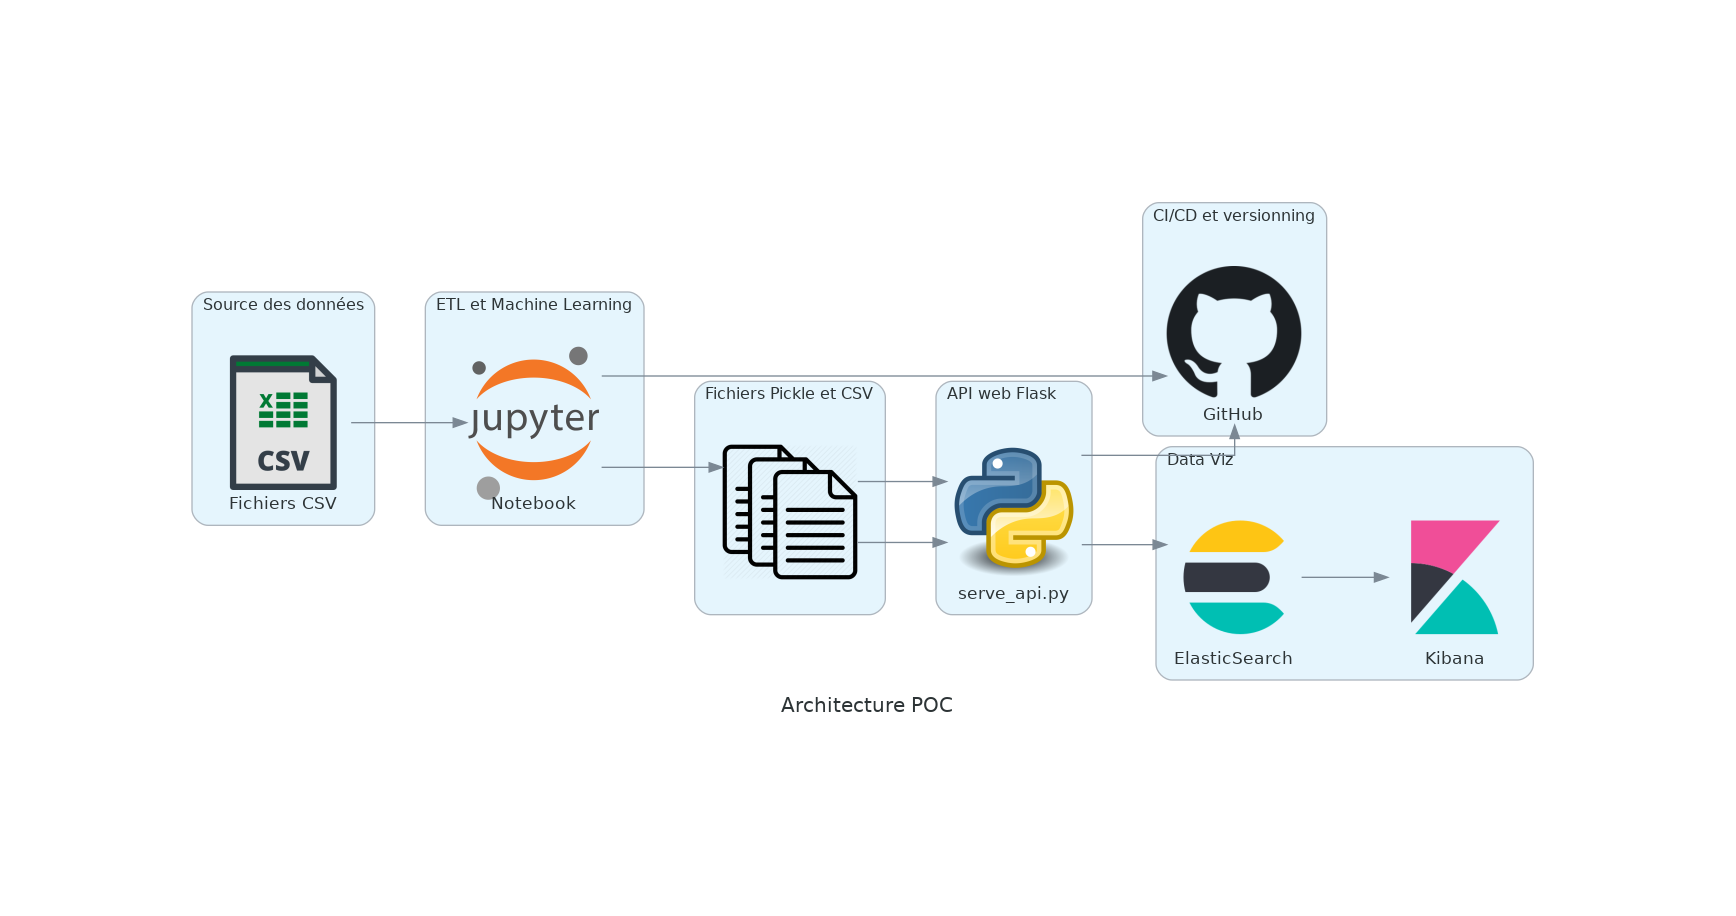

In [1]:
from diagrams import Cluster, Diagram
from diagrams.custom import Custom
from urllib.request import urlretrieve

from diagrams.onprem.vcs import Github
from diagrams.elastic.elasticsearch import Elasticsearch
from diagrams.elastic.elasticsearch import Kibana

with Diagram("Architecture POC", show=False) as diag:
    
    # Custom icons
    jupyter_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/1767px-Jupyter_logo.svg.png"
    jupyter_icon = "icons_diagram/jupyter.png"
    urlretrieve(jupyter_url, jupyter_icon)
    
    csvfile_url = "https://cdn-icons-png.flaticon.com/512/180/180855.png"
    csvfile_icon = "icons_diagram/csvfile.png"
    urlretrieve(csvfile_url, csvfile_icon)

    python_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Python.svg/768px-Python.svg.png"
    python_icon = "icons_diagram/python.png"
    urlretrieve(python_url, python_icon)

    
    files_url = "https://icon-library.com/images/file-icon/file-icon-14.jpg"
    files_icon = "icons_diagram/files.jpg"
    urlretrieve(files_url, files_icon)



    # Clusters
    with Cluster("Data Viz"):
        elastic = Elasticsearch("ElasticSearch")
        kibana = Kibana("Kibana")
        elastic >> kibana

    with Cluster("API web Flask"):
        python = Custom("serve_api.py", python_icon)
        python >> elastic

    with Cluster("CI/CD et versionning"):
        github = Github("GitHub")
    
    with Cluster("Fichiers Pickle et CSV"):
        files = Custom("", files_icon)
        files >> python

    with Cluster("ETL et Machine Learning"):
        jupyter_notebook = Custom("Notebook", jupyter_icon)
        jupyter_notebook >> github
        jupyter_notebook >> files >> python
        python >> github
    
    with Cluster("Source des données"):
        Custom("Fichiers CSV", csvfile_icon) >> jupyter_notebook

diag